In [191]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as opt

In [192]:
N = 1000
GENERATOR_SIGMA = 5

# Parameters to be estimated
A = 3.4
B = 2.1


In [193]:
# Generating some values.

unif = stats.uniform(0, 10)
x = np.random.uniform(0, 10, N)
x = np.sort(x)

y = A + B*x

# Each generated value will be normally distributed around the theoretical value of y.
y = np.array([y[i] + np.random.normal(loc=0, scale=GENERATOR_SIGMA) for i in range(len(y))])

A = 3.5345348203268188 ± 0.32684674633775856
B = 2.086949309982863 ± 0.05507987223929494


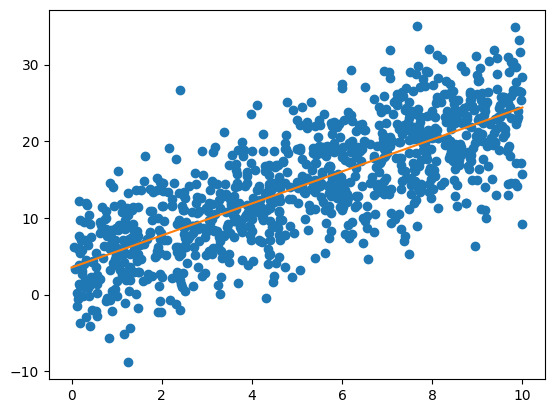

In [194]:
# Estimating the parameters

# Note that I could have used scipy.stats.linregress for linear regression.
par, cov = opt.curve_fit(lambda x, A, B: A + B*x, x, y)
sigmas = np.sqrt(np.diag(cov))

print('A = ' + str(par[0]) +  ' ± ' + str(sigmas[0]))
print('B = ' + str(par[1]) + ' ± ' + str(sigmas[1]))
A_est = par[0]
B_est = par[1]

plt.plot(x, y, 'o')

x_space = np.linspace(0, 10, 10000)
plt.plot(x_space, par[0] + par[1]*x_space)

In [195]:
# Calculating fit goodness with chisquare for functions

# Estimated sigma on y
sigma_y = np.sqrt(sum([ (y[i] - A - B * x[i])**2 for i in range(len(y))]) / (len(y) - 2))

print('sigma_y = ' + str(sigma_y))

chisquare = sum([ (y[i] - A - B * x[i])**2 for i in range(len(y)) ]) / sigma_y**2

reduced_chisquare = chisquare/(len(y) - 2)

reduced_chisquare

sigma_y = 4.991792103942957


1.0

Note that `sigma_y` ~= `SIGMA_GENERATOR` for a number of points big enough.
In fact, `sigma_y` is calculated on the basis that each real point's `y` is normally distributed around regression point's `y`. `SIGMA_GENERATOR` is indeed used to generate those numbers, so the two values matches.